- [sns.heatmap()](#heat)
    - sns.heatmap(data=)
    - sns.heatmap(data=, linewidths=)
    - sns.heatmap(data=, annot=True)
    - sns.heatmap(data=, cmap='')
- [sns.clustermap()](#cluster)
    - sns.clustermap(data=, linewidths=, annot=True, cmap='')
    - sns.clustermap(data=, col_cluster=False)

___

- __heatmap()__
      Visually displays the distribution of cell values with a color mapping.
- __clustermap()__
      Same visual as heatmap, but first conducts hierarchical clustering to reorganize data into groups.

___

## The Data

https://www.ined.fr/en/everything_about_population/data/all-countries/?lst_continent=900&lst_pays=926

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('country_table.csv')

In [3]:
df

,Countries,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
0,AFRICA,32.577,7.837,63.472,44.215,24.40
1,ASIA,15.796,7.030,73.787,23.185,8.44
2,EUROPE,10.118,11.163,78.740,3.750,0.38
3,LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
4,NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11
5,OCEANIA,16.235,6.788,78.880,16.939,12.79
6,WORLD,17.963,7.601,72.766,27.492,10.36


And what's a little hard to tell when you're just looking at all the numbers is what countries and what regions are similar to each other versus what regions are quite different and then how they compare to the overall world average. So instead, what we could do is use a heatmap to visualize this through the use of color.

__!!! Note__ that a heatmap should ideally have all the cells be in the same units, so the color mapping actually makes sense across the entire DataFrame.

But the minute you start adding in different units like years versus rate, then your numbers are going to be completely off from each other, basically reducing the effectiveness of this actual color mapping.

In [4]:
df = df.set_index('Countries')

In [5]:
df

,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
Countries,,,,,
AFRICA,32.577,7.837,63.472,44.215,24.40
ASIA,15.796,7.030,73.787,23.185,8.44
EUROPE,10.118,11.163,78.740,3.750,0.38
LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11
OCEANIA,16.235,6.788,78.880,16.939,12.79
WORLD,17.963,7.601,72.766,27.492,10.36


<a id='heat'></a>
## Heatmap

__`sns.heatmap(data=)`__

<AxesSubplot:ylabel='Countries'>

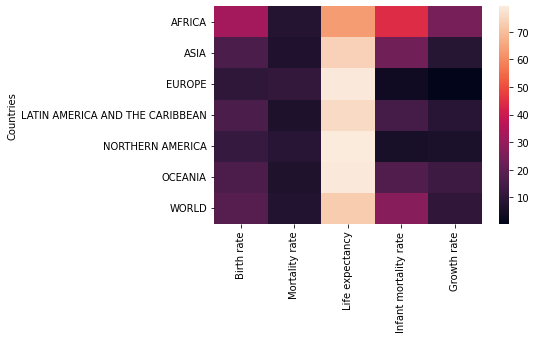

In [6]:
sns.heatmap(df)

---

Now, if you pass in the entire DataFrame, we have the problem where one of these columns (Life expectancy) is in completely different units than the other columns. And as a result the scale is completely different. 
<br>It looks almost like everyone has a similar growth rate. But let's go ahead and drop that 'Life expectancy' column.

<AxesSubplot:ylabel='Countries'>

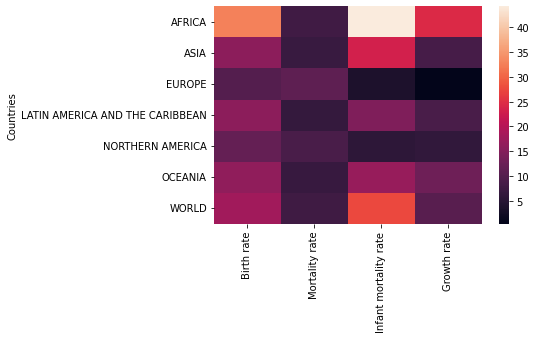

In [12]:
sns.heatmap(df.drop('Life expectancy', axis=1))

---

__`sns.heatmap(data=, linewidths=)`__

<AxesSubplot:ylabel='Countries'>

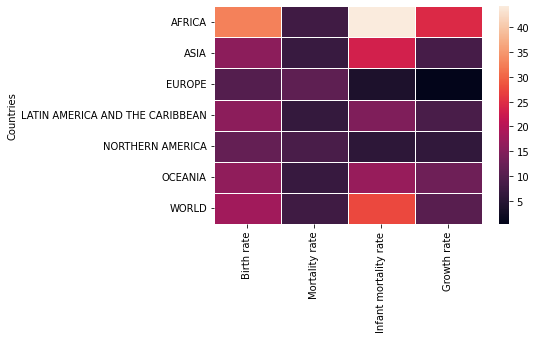

In [13]:
# to make it easier to read

sns.heatmap(df.drop('Life expectancy', axis=1), linewidths=0.5)

---

__`sns.heatmap(data=, annot=True)`__

<AxesSubplot:ylabel='Countries'>

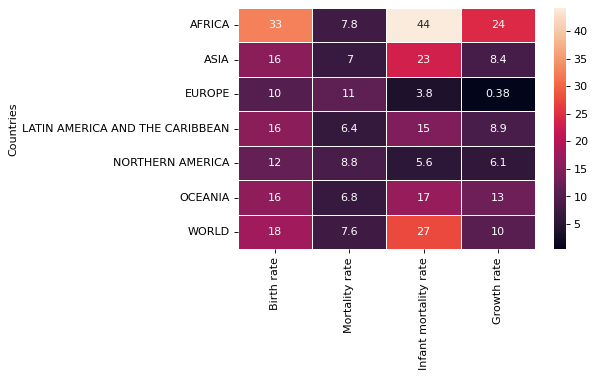

In [16]:
# sometimes you don't just want the colors, you also want the values themselves

plt.figure(dpi=80)
sns.heatmap(df.drop('Life expectancy', axis=1), linewidths=.5, annot=True)

---

__`sns.heatmap(data=, cmap='')`__

<AxesSubplot:ylabel='Countries'>

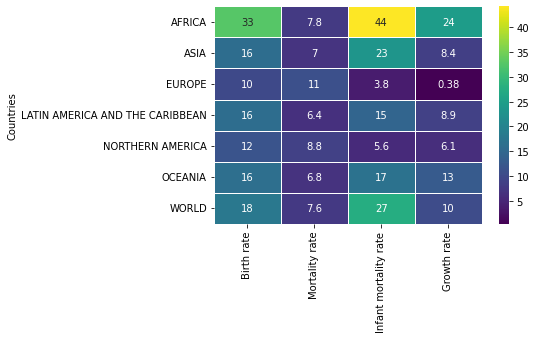

In [17]:
# color mapping

sns.heatmap(df.drop('Life expectancy', axis=1), linewidths=.5, annot=True, cmap='viridis')

___
---

<a id='cluster'></a>
## Clustermap

__`sns.clustermap(data=, linewidths=, annot=True, cmap='')`__

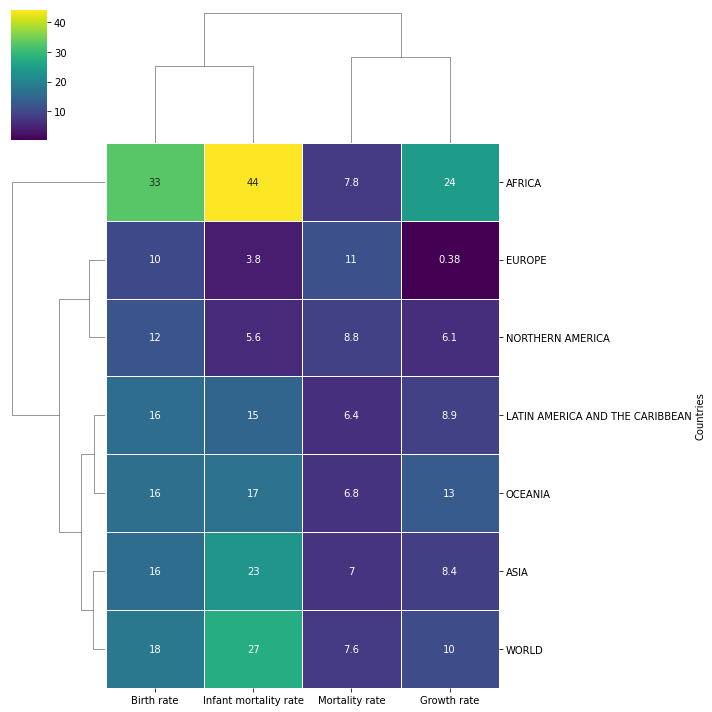

In [21]:
sns.clustermap(df.drop('Life expectancy', axis=1), cmap='viridis', linewidths=.5, annot=True)

---

__`sns.clustermap(data=, col_cluster=False)`__

Keep in mind that in certain situations it doesn't make sense to actually cluster the columns together.
<br>You can only cluster the index together.

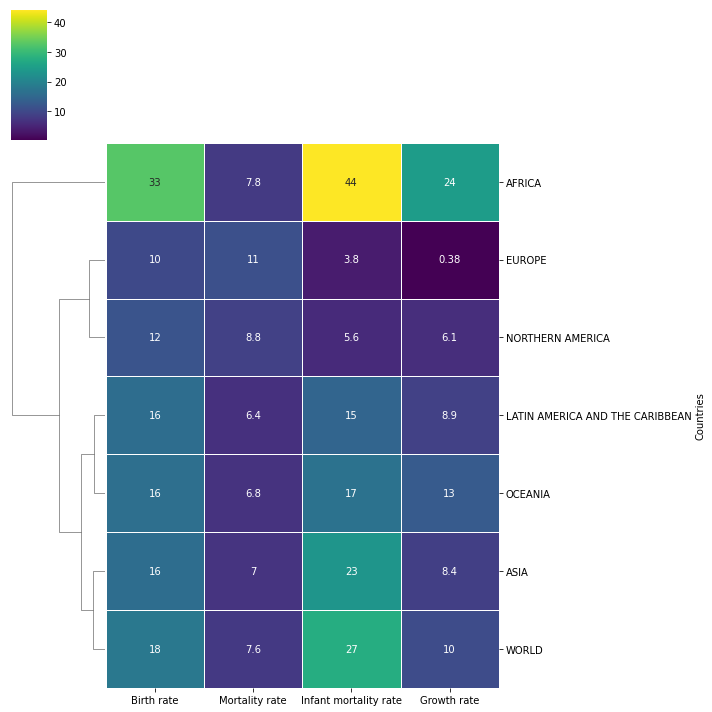

In [22]:
sns.clustermap(df.drop('Life expectancy', axis=1), cmap='viridis', linewidths=.5, annot=True, col_cluster=False)

Looks like I have a clustering bar here, which means Europe and North America in general are more similar to each other than the other groupings.

And we can see that it looks like Asia and the world are more similar to each other than Asia versus another grouping.
And in general, that makes sense because of Asia holds so much of the world's population that is going to be more aligned with the entire world than versus any other particular region.

___